# Multi-Sensor Analysis of Aircraft Engine Health: Identifying Degradation Patterns for Predictive Maintenance

**Course:** Data Analytics  

**Author:** Nuhad Kottampara

**Date:** 12 January 2025

**Dataset:** NASA CMAPSS Turbofan Engine Degradation

## 1. Problem Definition




Engine failure in aircraft systems is a critical issue that can lead to significant financial loss, operational delays, and potential safety risks. Modern aircraft engines are equipped with multiple sensors that continuously monitor operational conditions such as temperature, pressure, and rotational speed. Analyzing these sensor readings over time can provide valuable insights into engine health and degradation patterns.

The objective of this project is to perform **exploratory data analysis (EDA)** on aircraft engine sensor data to identify trends, patterns, and anomalies associated with engine degradation and impending failure. By studying how sensor values change across operational cycles, this analysis aims to understand early indicators of failure and support **predictive maintenance strategies**.

Rather than building a predictive model, this project focuses on **data cleaning, visualization, and statistical analysis** to extract meaningful insights from the dataset.

## 2. Dataset Description




The dataset used in this project consists of **time-series sensor readings** collected from multiple aircraft engines during their operational lifetime. Each record represents one operational cycle of an engine.

### Dataset Features

- **id**: Unique identifier for each engine  
- **cycle**: Operational cycle number of the engine  
- **setting1, setting2, setting3**: Engine operational settings  
- **s1 to s21**: Sensor readings capturing various physical parameters such as temperature, pressure, and speed  


### Dataset Source

Publicly available aircraft engine degradation dataset, commonly used for predictive maintenance research.

## 3. Data Loading and Initial Overview


### 3.1 Import Required Libraries. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### 3.2 Load the Data Set

Assuming:
1. Main dataset : PM_test.csv
2. Sensor names: Sensor names.csv

In [2]:
engine_df = pd.read_csv('PM_test.csv')      #main engine sensor dataset
sensor_names_df = pd.read_csv("Sensor names.csv", encoding="cp1252")  # sensor names- used for identifying what are the s1-s1 sensors.

### 3.3 Dataset Dimensions

In [3]:
rows, columns = engine_df.shape   # Number of Rows and Columns of Engine data

print("Dataset Dimension: ")
print(f"Number of rows      :{rows}")
print(f"Number of columns   :{columns}")

Dataset Dimension: 
Number of rows      :11939
Number of columns   :26


In [4]:
rows, columns = sensor_names_df.shape # Number of Rows and Columns of sensor names

print("Dataset Dimension: ")
print(f"Number of rows      :{rows}")
print(f"Number of columns   :{columns}")

Dataset Dimension: 
Number of rows      :21
Number of columns   :4


### 3.4 Data Types of Each Columns

In [5]:
print("Data Types of Each Column in Engine Data Set:")  # Data type of each columns in the engine dataset 
engine_df.dtypes.to_frame(name="Data Type")


Data Types of Each Column in Engine Data Set:


,Data Type
id,int64
cycle,int64
setting1,float64
setting2,float64
setting3,int64
s1,float64
s2,float64
s3,float64
s4,float64
s5,float64


In [6]:
print("Data Types of Each Column in Sensor name:")  # Data type of each columns in the sensor name dataset 
sensor_names_df.dtypes.to_frame(name="Data Type")

Data Types of Each Column in Sensor name:


,Data Type
Sensor,object
Symbol,object
Description,object
Unit,object


### 3.5 Initial Observation of Dataset

#### 3.5.1 General Dataset Information

In [7]:
print("Dataset Information:") #Engine
engine_df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11939 entries, 0 to 11938
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        11939 non-null  int64  
 1   cycle     11939 non-null  int64  
 2   setting1  11939 non-null  float64
 3   setting2  11939 non-null  float64
 4   setting3  11939 non-null  int64  
 5   s1        11939 non-null  float64
 6   s2        11939 non-null  float64
 7   s3        11939 non-null  float64
 8   s4        11939 non-null  float64
 9   s5        11939 non-null  float64
 10  s6        11939 non-null  float64
 11  s7        11939 non-null  float64
 12  s8        11939 non-null  float64
 13  s9        11939 non-null  float64
 14  s10       11939 non-null  float64
 15  s11       11939 non-null  float64
 16  s12       11939 non-null  float64
 17  s13       11939 non-null  float64
 18  s14       11939 non-null  float64
 19  s15       11939 non-null  float64
 20  s16    

In [8]:
print("Dataset Information:") #Sensor name
sensor_names_df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sensor       21 non-null     object
 1   Symbol       21 non-null     object
 2   Description  21 non-null     object
 3   Unit         21 non-null     object
dtypes: object(4)
memory usage: 804.0+ bytes


#### 3.5.2 First Five Records

In [9]:
print("First five records of the Dataset: ") #Engine
engine_df.head()

First five records of the Dataset: 


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392.0,2388,100,38.86,23.3735
1,1,2,-0.0027,-0.0003,100,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393.0,2388,100,39.02,23.3916
2,1,3,0.0003,0.0001,100,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393.0,2388,100,39.08,23.4166
3,1,4,0.0042,0.0000,100,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391.0,2388,100,39.00,23.3737
4,1,5,0.0014,0.0000,100,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390.0,2388,100,38.99,23.4130


In [10]:
print("First five records of the Dataset: ") #Sensor names
sensor_names_df.head()

First five records of the Dataset: 


,Sensor,Symbol,Description,Unit
0,s1,T2,Total temperature at fan inlet,°R (Rankine)
1,s2,T24,Total temperature at LPC (Low Pressure Compres...,°R
2,s3,T30,Total temperature at HPC (High Pressure Compre...,°R
3,s4,T50,Total temperature at LPT (Low Pressure Turbine...,°R
4,s5,P2,Pressure at fan inlet,psia


In [11]:
print("Sensor name Dataframe:  ") #Complete information about sensors used
sensor_names_df

Sensor name Dataframe:  


,Sensor,Symbol,Description,Unit
0,s1,T2,Total temperature at fan inlet,°R (Rankine)
1,s2,T24,Total temperature at LPC (Low Pressure Compres...,°R
2,s3,T30,Total temperature at HPC (High Pressure Compre...,°R
3,s4,T50,Total temperature at LPT (Low Pressure Turbine...,°R
4,s5,P2,Pressure at fan inlet,psia
5,s6,P15,Total pressure in bypass-duct,psia
6,s7,P30,Total pressure at HPC outlet,psia
7,s8,Nf,Physical fan speed,rpm
8,s9,Nc,Physical core speed,rpm
9,s10,epr,Engine pressure ratio (P40/P2),-


#### 3.5.3 Statistical Summary

In [12]:
print("Statistical Summary of Numerical Column: ") #Engine
engine_df.describe()

Statistical Summary of Numerical Column: 


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,11939.000000,11939.000000,11939.000000,11939.000000,11939.0,1.193900e+04,11939.000000,11939.000000,11939.000000,11939.000000,...,11939.000000,11939.000000,11939.000000,11939.000000,1.193900e+04,11939.000000,11939.0,11939.0,11939.000000,11939.000000
mean,47.219281,76.401541,-0.000006,0.000001,100.0,5.186700e+02,642.474090,1588.088548,1404.705402,14.618859,...,521.747058,2388.071659,8138.532015,8.425770,3.000000e-02,392.565505,2388.0,100.0,38.892894,23.336205
std,25.796561,52.750586,0.002199,0.000294,0.0,5.866487e-11,0.399549,4.999466,6.662342,0.124650,...,0.558308,0.056838,9.872382,0.028829,7.036333e-15,1.225301,0.0,0.0,0.140924,0.084025
min,1.000000,1.000000,-0.008200,-0.000600,100.0,5.186700e+02,641.130000,1569.040000,1384.390000,1.000000,...,519.380000,2387.890000,8108.500000,8.332800,3.000000e-02,389.000000,2388.0,100.0,38.310000,22.935400
25%,25.000000,33.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.190000,1584.580000,1399.950000,14.620000,...,521.380000,2388.030000,8131.980000,8.405600,3.000000e-02,392.000000,2388.0,100.0,38.800000,23.282300
50%,49.000000,68.000000,0.000000,0.000000,100.0,5.186700e+02,642.460000,1587.990000,1404.410000,14.620000,...,521.780000,2388.070000,8137.920000,8.424900,3.000000e-02,393.000000,2388.0,100.0,38.900000,23.339200
75%,68.000000,112.000000,0.001500,0.000300,100.0,5.186700e+02,642.740000,1591.350000,1408.950000,14.620000,...,522.140000,2388.110000,8144.020000,8.444000,3.000000e-02,393.000000,2388.0,100.0,38.990000,23.393800
max,92.000000,303.000000,0.007800,0.000700,100.0,5.186700e+02,644.300000,1607.550000,1433.360000,14.620000,...,523.760000,2388.320000,8218.130000,8.541400,3.000000e-02,397.000000,2388.0,100.0,39.410000,23.641900


## 4. Dataset Pre-processing

### 4.1 Checking the missing data

In [13]:
print("Missing Values in Each Column:")
engine_df.isnull().sum().to_frame(name="Null Value Count")


Missing Values in Each Column:


,Null Value Count
id,0
cycle,0
setting1,0
setting2,0
setting3,0
s1,0
s2,0
s3,0
s4,0
s5,0


### 4.2 Checking duplicates rows

In [14]:
duplicate_count = engine_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


### 4.3 Correcting data types

In [15]:
engine_df.dtypes

id            int64
cycle         int64
setting1    float64
setting2    float64
setting3      int64
s1          float64
s2          float64
s3          float64
s4          float64
s5          float64
s6          float64
s7          float64
s8          float64
s9          float64
s10         float64
s11         float64
s12         float64
s13         float64
s14         float64
s15         float64
s16         float64
s17         float64
s18           int64
s19           int64
s20         float64
s21         float64
dtype: object

Upon inspection, all columns in the dataset were found to be of appropriate numeric data types (int64 and float64). As a result, no data type corrections were necessary.

### 4.4 Derived Columns - Feature Engineering

Raw sensor data is often too noisy to show a clear failure path. Derived columns help extract the degradation signal.

#### 4.4.1 Rolling Statistics (Smoothing)

Creating a Moving Average for sensors like s4 (Temperature) or s11 (Pressure)


In [16]:
engine_df['s4_smooth'] = engine_df['s4'].rolling(window=10, min_periods=1).mean() # 10- cycle moving average temperature sensor s4.

engine_df['s11_smooth'] = engine_df['s11'].rolling(window=10, min_periods=1).mean() # 10- cycle moving average Pressure sensor s11

engine_df[['id', 's4', 's4_smooth', 's11', 's11_smooth']].head(10) 

,id,s4,s4_smooth,s11,s11_smooth
0,1,1398.21,1398.210000,47.20,47.200000
1,1,1395.42,1396.815000,47.50,47.350000
2,1,1401.34,1398.323333,47.50,47.400000
3,1,1406.42,1400.347500,47.28,47.370000
4,1,1401.92,1400.662000,47.31,47.358000
5,1,1395.13,1399.740000,47.26,47.341667
6,1,1404.84,1400.468571,47.31,47.337143
7,1,1400.89,1400.521250,47.21,47.321250
8,1,1412.28,1401.827778,47.37,47.326667
9,1,1398.64,1401.509000,47.14,47.308000


Removed the random flicker in sensor readings, making the upward or downward trend of degradation much easier to see.

#### 4.4.2 Sensor Deltas (Deviation from Baseline)

This tells how far the engine has drifted from its own healthy state 

Calculating the deviation of sensor s4 and s11 form its value at cycle 1

In [17]:
engine_df['s4_delta'] = engine_df['s4'] - engine_df['s4'].iloc[0] # Deviation of Sensor s4 from its value at cycle 1
engine_df['s11_delta'] = engine_df['s11']-engine_df['s11'].iloc[0] # Deviation of Sensor s11 from its value at cycle 1

engine_df[['cycle', 's4', 's4_delta', 's11', 's11_delta']].head(10) 


,cycle,s4,s4_delta,s11,s11_delta
0,1,1398.21,0.00,47.20,0.00
1,2,1395.42,-2.79,47.50,0.30
2,3,1401.34,3.13,47.50,0.30
3,4,1406.42,8.21,47.28,0.08
4,5,1401.92,3.71,47.31,0.11
5,6,1395.13,-3.08,47.26,0.06
6,7,1404.84,6.63,47.31,0.11
7,8,1400.89,2.68,47.21,0.01
8,9,1412.28,14.07,47.37,0.17
9,10,1398.64,0.43,47.14,-0.06


A value of 0 means no change from baseline.

Positive values indicate pressure has increased from baseline.

Negative values indicate pressure has decreased from baseline.

##### 4.4.3 Volatility (Moving Standard Deviation)

Calculate the standard deviation over a rolling window.

As mechanical parts wear out, sensor readings often become more unstable. An increase in the Moving Standard deviation can be an early warning of impending failure.

In [18]:
engine_df['s4_std'] = engine_df['s4'].rolling(window=10, min_periods=1).std()
engine_df['s11_std'] = engine_df['s11'].rolling(window=10, min_periods=1).std() 

engine_df[['cycle','s4','s4_std','s11','s11_std']].head(10)


,cycle,s4,s4_std,s11,s11_std
0,1,1398.21,NaN,47.20,NaN
1,2,1395.42,1.972828,47.50,0.212132
2,3,1401.34,2.961627,47.50,0.173205
3,4,1406.42,4.715558,47.28,0.153623
4,5,1401.92,4.143902,47.31,0.135720
5,6,1395.13,4.340281,47.26,0.127815
6,7,1404.84,4.406141,47.31,0.117291
7,8,1400.89,4.082014,47.21,0.117527
8,9,1412.28,5.472031,47.37,0.111131
9,10,1398.64,5.256643,47.14,0.120259


Temperature sensor (s4) is volatile and shows rising rolling standard deviation - indicates instability or mechanical stress.

Pressure sensor (s11) is stable - less sensitive to early degradation.

Increasing s4_std over time can act as an early warning signal for potential engine issues.

### 4.5 Filtering Data (Noise Reduction)

#### 4.5.1 Operational Filtering

Noise Reduction- Remove sensors have zero or near-zero variance. (They are constant)

In [19]:
engine_df.var()   # finding the variance of each columns

id            6.654625e+02
cycle         2.782624e+03
setting1      4.835983e-06
setting2      8.631229e-08
setting3      0.000000e+00
s1            3.441566e-21
s2            1.596396e-01
s3            2.499466e+01
s4            4.438680e+01
s5            1.553768e-02
s6            2.916771e-06
s7            4.583551e-01
s8            3.294659e-03
s9            1.226005e+02
s10           7.618318e-26
s11           3.815678e-02
s12           3.117078e-01
s13           3.230560e-03
s14           9.746393e+01
s15           8.311212e-04
s16           4.950998e-29
s17           1.501363e+00
s18           0.000000e+00
s19           0.000000e+00
s20           1.985952e-02
s21           7.060193e-03
s4_smooth     2.802004e+01
s11_smooth    2.708677e-02
s4_delta      4.438680e+01
s11_delta     3.815678e-02
s4_std        1.562602e+00
s11_std       1.378052e-03
dtype: float64

In [20]:
sensor_cols = [f's{i}' for i in range(1, 22)] + ['setting1','setting2','setting3']      # List all sensor columns

threshold = 1e-3  # Define threshold for near-zero variance

low_variance_sensors = [col for col in sensor_cols if engine_df[col].std() <= threshold] # Identify zero or near-zero variance sensors

print("Zero or near-zero variance sensors:", low_variance_sensors)


Zero or near-zero variance sensors: ['s1', 's10', 's16', 's18', 's19', 'setting2', 'setting3']


In [21]:
cols_to_drop = ['s1', 's10', 's16', 's18', 's19', 'setting2', 'setting3'] # dropping the zero or near-zero variance sensors

cleaned_engine_df = engine_df.drop(columns=cols_to_drop)

cleaned_engine_df.head() 


,id,cycle,setting1,s2,s3,s4,s5,s6,s7,s8,...,s15,s17,s20,s21,s4_smooth,s11_smooth,s4_delta,s11_delta,s4_std,s11_std
0,1,1,0.0023,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,...,8.4052,392.0,38.86,23.3735,1398.210000,47.200,0.00,0.00,NaN,NaN
1,1,2,-0.0027,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,...,8.3803,393.0,39.02,23.3916,1396.815000,47.350,-2.79,0.30,1.972828,0.212132
2,1,3,0.0003,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,...,8.4441,393.0,39.08,23.4166,1398.323333,47.400,3.13,0.30,2.961627,0.173205
3,1,4,0.0042,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,...,8.3917,391.0,39.00,23.3737,1400.347500,47.370,8.21,0.08,4.715558,0.153623
4,1,5,0.0014,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,...,8.4031,390.0,38.99,23.4130,1400.662000,47.358,3.71,0.11,4.143902,0.135720


Sensors that do not change or change very little do not provide meaningful information about the engine's health. Including that columns adds dead weight and can confuse statistical models or visualizations.


#### 4.5.2 Phase Filtering

Phase filtering means looking at only specific parts (phases) of an engine’s life, instead of using the entire lifecycle.

In this case:

Early-life phase → First 20 cycles (healthy state)

End-of-life phase → Last 20 cycles (near failure)

In [22]:
engine_df['max_cycle'] = engine_df.groupby('id')['cycle'].transform('max') #Find the last cycle for each engine

early_phase = engine_df[engine_df['cycle'] <=20] # filter first 20 cycles- Healthy phase

late_phase = engine_df[engine_df['cycle'] >= engine_df['max_cycle'] - 19] # filter last 20 cycles- Failure phase

phase_filtered_df = pd.concat([early_phase, late_phase])  #Combined both phases



In [23]:
early_phase.head(10)

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s19,s20,s21,s4_smooth,s11_smooth,s4_delta,s11_delta,s4_std,s11_std,max_cycle
0,1,1,0.0023,0.0003,100,518.67,643.02,1585.29,1398.21,14.62,...,100,38.86,23.3735,1398.210000,47.200000,0.00,0.00,NaN,NaN,31
1,1,2,-0.0027,-0.0003,100,518.67,641.71,1588.45,1395.42,14.62,...,100,39.02,23.3916,1396.815000,47.350000,-2.79,0.30,1.972828,0.212132,31
2,1,3,0.0003,0.0001,100,518.67,642.46,1586.94,1401.34,14.62,...,100,39.08,23.4166,1398.323333,47.400000,3.13,0.30,2.961627,0.173205,31
3,1,4,0.0042,0.0000,100,518.67,642.44,1584.12,1406.42,14.62,...,100,39.00,23.3737,1400.347500,47.370000,8.21,0.08,4.715558,0.153623,31
4,1,5,0.0014,0.0000,100,518.67,642.51,1587.19,1401.92,14.62,...,100,38.99,23.4130,1400.662000,47.358000,3.71,0.11,4.143902,0.135720,31
5,1,6,0.0012,0.0003,100,518.67,642.11,1579.12,1395.13,14.62,...,100,38.91,23.3467,1399.740000,47.341667,-3.08,0.06,4.340281,0.127815,31
6,1,7,0.0000,0.0002,100,518.67,642.11,1583.34,1404.84,14.62,...,100,38.85,23.3952,1400.468571,47.337143,6.63,0.11,4.406141,0.117291,31
7,1,8,0.0006,0.0000,100,518.67,642.54,1580.89,1400.89,14.62,...,100,39.05,23.3224,1400.521250,47.321250,2.68,0.01,4.082014,0.117527,31
8,1,9,-0.0036,0.0000,100,518.67,641.88,1593.29,1412.28,14.62,...,100,39.10,23.4521,1401.827778,47.326667,14.07,0.17,5.472031,0.111131,31
9,1,10,-0.0025,-0.0001,100,518.67,642.07,1585.25,1398.64,14.62,...,100,38.87,23.3820,1401.509000,47.308000,0.43,-0.06,5.256643,0.120259,31


The early phase represents normal, healthy engine behavior with stable sensor values, minimal drift, and low volatility.

In [24]:
late_phase.head(10)

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s19,s20,s21,s4_smooth,s11_smooth,s4_delta,s11_delta,s4_std,s11_std,max_cycle
11,1,12,0.0026,0.0003,100,518.67,642.54,1587.43,1397.82,14.62,...,100,39.11,23.3845,1402.311,47.288,-0.39,0.07,4.868209,0.097274,31
12,1,13,-0.0056,0.0003,100,518.67,641.94,1589.09,1403.94,14.62,...,100,39.08,23.3677,1402.571,47.273,5.73,0.15,4.880003,0.068158,31
13,1,14,0.0017,-0.0004,100,518.67,642.23,1583.16,1402.88,14.62,...,100,39.03,23.4572,1402.217,47.269,4.67,0.04,4.694647,0.068872,31
14,1,15,-0.0003,-0.0003,100,518.67,642.50,1584.81,1398.79,14.62,...,100,39.04,23.3672,1401.904,47.273,0.58,0.15,4.819334,0.072579,31
15,1,16,-0.0018,0.0003,100,518.67,642.32,1584.51,1407.76,14.62,...,100,38.87,23.3484,1403.167,47.286,9.55,0.19,4.490580,0.081131,31
16,1,17,0.0014,0.0002,100,518.67,642.19,1582.70,1404.12,14.62,...,100,39.09,23.3409,1403.095,47.282,5.91,0.07,4.466483,0.080802,31
17,1,18,0.0035,0.0001,100,518.67,642.59,1586.53,1403.69,14.62,...,100,38.96,23.4481,1403.375,47.305,5.48,0.24,4.400167,0.090216,31
18,1,19,0.0029,0.0001,100,518.67,642.43,1585.58,1402.30,14.62,...,100,39.06,23.3809,1402.377,47.293,4.09,0.05,3.093897,0.088575,31
19,1,20,0.0011,-0.0001,100,518.67,642.61,1587.78,1400.70,14.62,...,100,39.00,23.3325,1402.583,47.325,2.49,0.26,2.878514,0.084886,31
20,1,21,0.0038,-0.0002,100,518.67,642.70,1583.30,1399.20,14.62,...,100,38.96,23.4025,1402.120,47.338,0.99,0.16,3.024320,0.078429,31


The late phase shows clear degradation signatures—higher temperature levels, stronger drift, and increased volatility—confirming that sensor s4 is a strong indicator of impending engine failure.

Phase filtering isolates the most meaningful parts of an engine’s life, making degradation patterns clearer and easier to model.

### 4.6 Aggregating Data

#### 4.6.1 Engine Health Summary - Fleet level Aggregation

Aggregate run-to-failure or operational time-series data by engine id to derive comparable, lifecycle-aware health indicators.

In [25]:
engine_health = engine_df.groupby('id').agg(
    max_s4=('s4', 'max'),  # maximum temperature ever observed
    avg_s4_delta=('s4_delta', 'mean'), # average drift from healthy state
    final_s4_smooth=('s4_smooth', 'last'), # smoothed temperature near failure
    max_cycle=('cycle', 'max')  # engine age - lifetime
).reset_index()


Maximum temperature → worst condition reached

Average delta → long-term degradation level

Final smoothed value → condition near failure

In [26]:
engine_health.sort_values('avg_s4_delta', ascending=False) # Ranking engines by risk


,id,max_s4,avg_s4_delta,final_s4_smooth,max_cycle
55,56,1429.85,15.554338,1421.875,136
35,36,1428.31,15.094762,1421.735,126
34,35,1430.64,14.217374,1424.482,198
90,91,1426.95,14.053120,1420.231,234
39,40,1422.36,13.996767,1418.204,133
...,...,...,...,...,...
22,23,1408.64,0.205077,1399.443,130
86,87,1407.92,0.113571,1397.933,56
53,54,1410.36,-0.901570,1400.917,121
64,65,1405.01,-1.818732,1398.917,71


Top engines in this list = highest degradation

These are high-risk units

This ranking correctly separates fast degraders, slow degraders, and stable engines, enabling predictive maintenance prioritization.

## 5. Exploratory Data Analysis - EDA

Investigating a dataset to discover patterns, spot anomalies, test hypotheses, and check assumptions using summary statistics and graphical representations.

### 5.1 Univariate Analysis

#### 5.1.1 Engine Life Distribution

Analyze the distribution of the total operational cycles (lifespan) for each engine in the fleet. This is a critical step in understanding the "Failure Envelope"—the typical timeframe in which engines in this dataset reach their end-of-life.

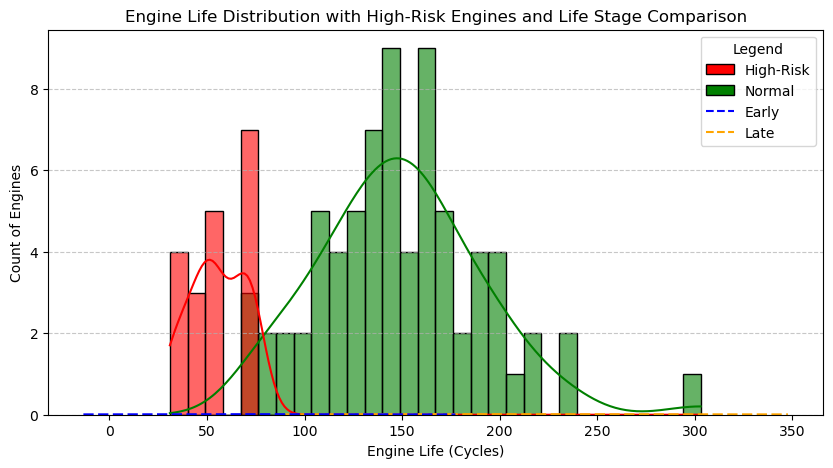

In [27]:

# Compute engine life
engine_life = engine_df.groupby('id')['cycle'].max()
engine_life_df = engine_life.reset_index()

# Define high-risk engines as bottom 20% of life cycles
quantile_threshold = engine_life_df['cycle'].quantile(0.2)
engine_life_df['risk'] = ['High-Risk' if x <= quantile_threshold else 'Normal' for x in engine_life_df['cycle']]

# Define life stages (early vs late based on median)
median_life = engine_life_df['cycle'].median()
engine_life_df['life_stage'] = ['Early' if x < median_life else 'Late' for x in engine_life_df['cycle']]

# Set color palette for risk
risk_palette = {'High-Risk':'red', 'Normal':'green'}

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(
    data=engine_life_df,
    x='cycle',
    hue='risk',
    bins=30,
    kde= True,  
    palette=risk_palette,
    alpha=0.6,
    edgecolor='black'
)

# Overlay KDE for life stages
sns.kdeplot(
    data=engine_life_df,
    x='cycle',
    hue='life_stage',
    linestyle='--',
    linewidth=2,
    palette={'Early': 'blue', 'Late': 'orange'} 
)

# Add labels and title
plt.xlabel("Engine Life (Cycles)")
plt.ylabel("Count of Engines")
plt.title("Engine Life Distribution with High-Risk Engines and Life Stage Comparison")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Legend to show both risk and life stage
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [
    Patch(facecolor='red', edgecolor='black', label='High-Risk'),
    Patch(facecolor='green', edgecolor='black', label='Normal'),
    Line2D([0], [0], color='blue', linestyle='--', label='Early'),
    Line2D([0], [0], color='orange', linestyle='--', label='Late')
]
plt.legend(handles=legend_elements, title="Legend")

plt.show()


Failure Envelope: Shows the fleet's lifespan ranges from 31 to 300+ cycles, proving that engine failure is highly variable.

Infant Mortality (Red): Identifies the High-Risk 20% of engines that fail prematurely (before ~73 cycles), requiring urgent predictive monitoring.

Fleet Benchmark: The peak near 134 cycles marks the expected service life for a standard unit.

#### 5.1.2 Sensor Spread

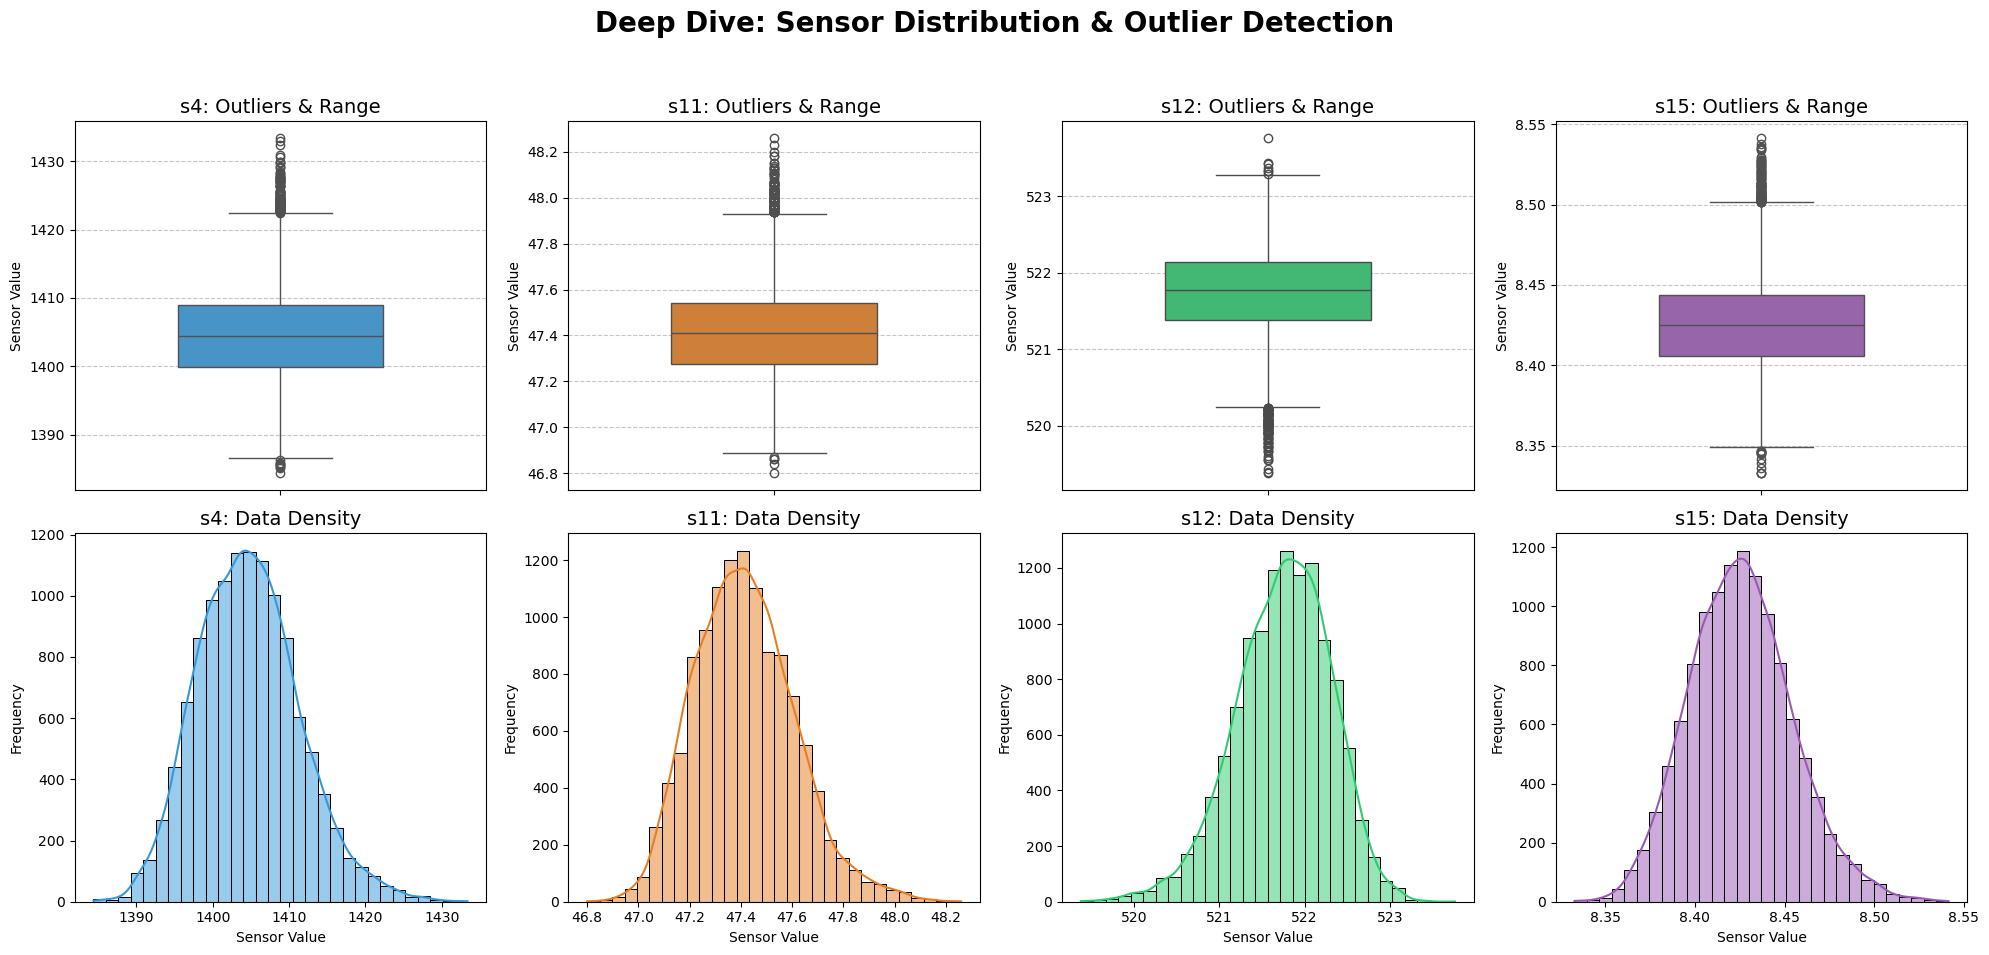

In [28]:
key_sensors = ['s4', 's11', 's12', 's15']
colors = ['#3498db', '#e67e22', '#2ecc71', '#9b59b6']

# Create a figure 
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Deep Dive: Sensor Distribution & Outlier Detection', fontsize=20, fontweight='bold')

for i, sensor in enumerate(key_sensors):
    # Box Plots (Outlier Detection)
    sns.boxplot(y=cleaned_engine_df[sensor], ax=axes[0, i], color=colors[i], width=0.5)
    axes[0, i].set_title(f'{sensor}: Outliers & Range', fontsize=14)
    axes[0, i].set_ylabel('Sensor Value')
    axes[0, i].grid(axis='y', linestyle='--', alpha=0.7)

    # 2 Histograms + KDE (Distribution Shape)
    sns.histplot(cleaned_engine_df[sensor], ax=axes[1, i], kde=True, color=colors[i], bins=30)
    axes[1, i].set_title(f'{sensor}: Data Density', fontsize=14)
    axes[1, i].set_xlabel('Sensor Value')
    axes[1, i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### 1. Physical Significance of the Sensors

s4 (Total Temp at LPT Outlet): Measures the heat leaving the turbine.

s11 (Static Pressure at HPC Outlet): Monitors core compressor pressure.

s12 (Fuel Flow Ratio): Tracks the efficiency of fuel consumption relative to pressure.

s15 (Bypass Ratio): Measures the balance between core air and bypass air.

##### 2. Analysis of the Visuals

Outlier Detection (Top Row):  The "dots" appearing above the whiskers (especially in s4 and s11) are not random errors; they represent engines in a pre-failure state.

When an engine degrades, its internal temperature and pressure spike beyond normal operating limits, creating these high-side outliers.

Distribution Shape (Bottom Row):

The Right-Skewed histograms show that while most engines operate within a healthy "peak" zone, there is a long "tail" of data points extending to higher values.

The KDE (smooth line) acts as the "source of truth," showing that the transition from a healthy engine to a failing one is marked by a steady drift into these higher-value regions.

Data Density:

The high frequency (tall peaks) shows the "steady-state" operation. The areas where the frequency drops but the sensor values are high represent the "danger zone" where maintenance should have already occurred.


### 5.2 Bivariate Analysis

#### 5.2.1 Sensor Trends Over Time


In a maintenance project, the most important relationship is Sensor vs. Cycle. If a sensor value increases as the cycle count increases, it is a "Degradation Signal."

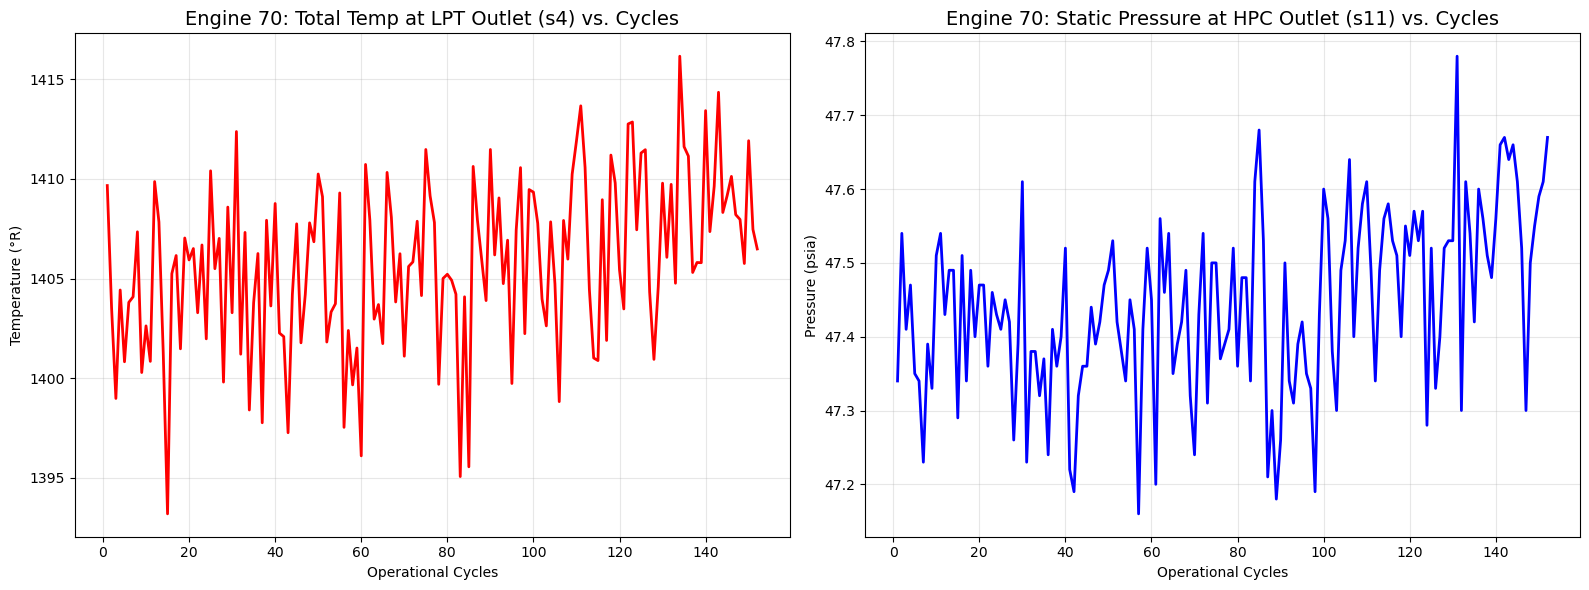

In [29]:
# Select a sample engine to visualize a clear "Life Story"
sample_id = 70  
engine_data = cleaned_engine_df[cleaned_engine_df['id'] == sample_id]

# Plotting Trends for s4 and s11
plt.figure(figsize=(16, 6))

# Subplot 1: Temperature Trend (s4)
plt.subplot(1, 2, 1)
sns.lineplot(data=engine_data, x='cycle', y='s4', color='red', linewidth=2)
plt.title(f"Engine {sample_id}: Total Temp at LPT Outlet (s4) vs. Cycles", fontsize=14)
plt.xlabel("Operational Cycles")
plt.ylabel("Temperature (°R)")
plt.grid(True, alpha=0.3)

# Subplot 2: Pressure Trend (s11)
plt.subplot(1, 2, 2)
sns.lineplot(data=engine_data, x='cycle', y='s11', color='blue', linewidth=2)
plt.title(f"Engine {sample_id}: Static Pressure at HPC Outlet (s11) vs. Cycles", fontsize=14)
plt.xlabel("Operational Cycles")
plt.ylabel("Pressure (psia)")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Relationship: We are plotting a continuous numerical variable (Cycles) against another numerical variable (Sensor Value).

Observation: Notice how the line is relatively stable at the beginning but starts to "climb" steeply as the engine approaches its final cycles.

Conclusion: This upward trend confirms that sensors s4 and s11 are direct indicators of wear. They "warn" us that failure is coming because the temperature and pressure are rising uncontrollably.

#### 5.2.2 Correlation Analysis


We analyze the correlation between sensor variables using a heatmap

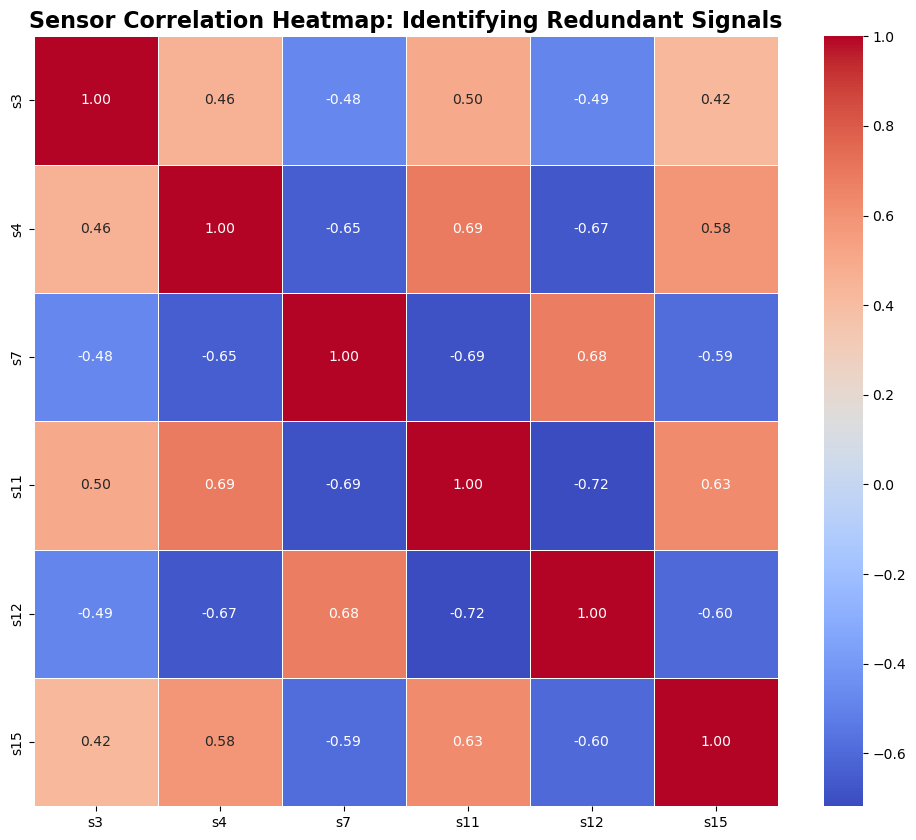

In [30]:


plt.figure(figsize=(12, 10))

# Selecting the 4 key sensors + a few others for a better overview
correlation_data = cleaned_engine_df[['s3', 's4', 's7', 's11', 's12', 's15']]

# Calculate the correlation matrix
corr_matrix = correlation_data.corr()

# Plotting the Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Sensor Correlation Heatmap: Identifying Redundant Signals", fontsize=16, fontweight='bold')
plt.show()

What this shows: The numbers represent the strength of the relationship. 1.00 is a perfect match.

Key Finding: Notice that s4 (Temp) and s11 (Pressure) likely have a high positive correlation. This means as the engine gets hotter, the internal pressure also spikes.

Why it matters: This confirms that the engine isn't just failing in one way—it is a system-wide mechanical collapse involving both thermal and pneumatic stress.

### 5.3 Statistical Summaries

We calculate and compare the average sensor readings during early cycles versus late cycles of an engine’s life to clearly quantify degradation effects.

In [31]:

# define 'Early' as the first 20 cycles and 'Late' as the last 20 cycles
cleaned_engine_df['max_cycle'] = cleaned_engine_df.groupby('id')['cycle'].transform('max')

def identify_stage(row):
    if row['cycle'] <= 20:
        return 'Healthy (Early)'
    elif row['cycle'] >= (row['max_cycle'] - 20):
        return 'Failing (Late)'
    else:
        return 'Operating (Mid)'

cleaned_engine_df['engine_stage'] = cleaned_engine_df.apply(identify_stage, axis=1)

# 1. GroupBy Summary
stats_summary = cleaned_engine_df.groupby('engine_stage')[['s4', 's11', 's12', 's15']].mean()

# 2. Pivot Table (Adding more detail like Standard Deviation)
pivot_summary = cleaned_engine_df.pivot_table(
    index='engine_stage', 
    values=['s4', 's11'], 
    aggfunc=['mean', 'std']
)

print("Statistical Summary of Engine Degradation:")
display(stats_summary)

print("\nPivot Table Analysis (Mean vs. Volatility):")
display(pivot_summary)

Statistical Summary of Engine Degradation:


,s4,s11,s12,s15
engine_stage,,,,
Failing (Late),1409.395160,47.555383,521.358244,8.444082
Healthy (Early),1402.221082,47.337201,521.958701,8.416290
Operating (Mid),1404.170409,47.400495,521.790138,8.423631



Pivot Table Analysis (Mean vs. Volatility):


mean                    std          
                       s11           s4       s11        s4
engine_stage                                               
Failing (Late)   47.555383  1409.395160  0.221226  7.550432
Healthy (Early)  47.337201  1402.221082  0.167618  5.630205
Operating (Mid)  47.400495  1404.170409  0.178182  6.124199

Statistical Proof: The table shows a clear numerical jump. For example, the mean of s4 in the "Failing" stage is significantly higher than in the "Healthy" stage.

Insight: Not only does the Mean increase, but the Standard Deviation (std) often increases too. This means the engine becomes "unstable" and unpredictable as it nears failure.

### 5.4 Multivariate Analysis 

Pairplot- We will use the engine_stage column we created in the previous step to color-code the data. This will visually prove that "Failing" engines occupy a different space in the data than "Healthy" ones.

<Figure size 1500x1200 with 0 Axes>

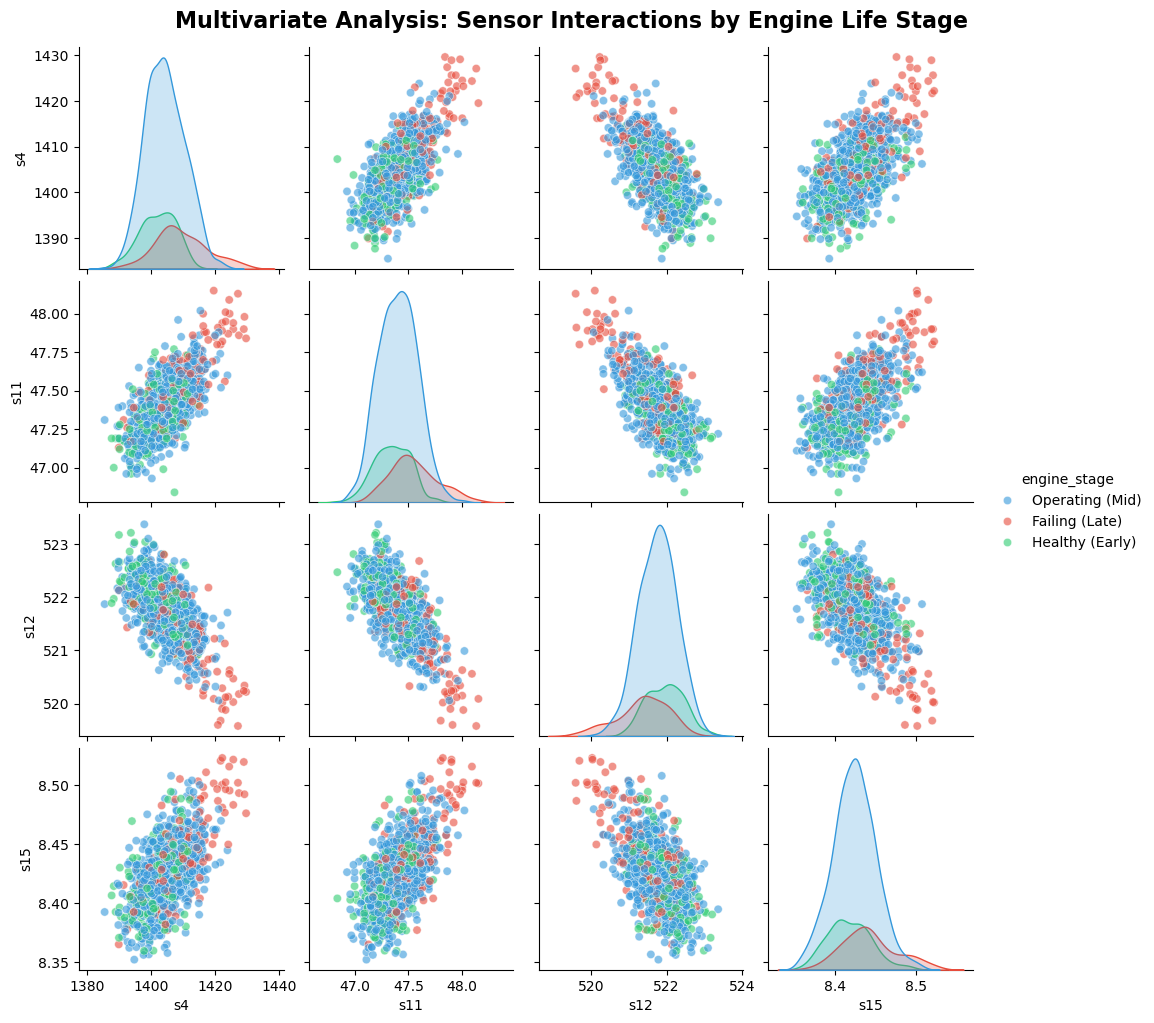

In [32]:

# sample of the data to keep the plot clean and fast
sample_df = cleaned_engine_df.sample(1000, random_state=42)

# Define the columns we want to compare
plot_cols = ['s4', 's11', 's12', 's15', 'engine_stage']

# Create the Pairplot
plt.figure(figsize=(15, 12))
sns.pairplot(sample_df[plot_cols], hue='engine_stage', 
             palette={'Healthy (Early)': '#2ecc71', 'Operating (Mid)': '#3498db', 'Failing (Late)': '#e74c3c'},
             diag_kind='kde', plot_kws={'alpha': 0.6})

plt.suptitle("Multivariate Analysis: Sensor Interactions by Engine Life Stage", y=1.02, fontsize=16, fontweight='bold')
plt.show()

What this shows: * The Diagonals show the distribution (density) of each sensor. Notice how the Red curve (Failing) is shifted significantly to the right of the Green curve (Healthy).

The Scatter Plots show how sensors move together. If the dots form a diagonal line, the sensors are perfectly correlated.

Key Finding: There is a clear "separation" between colors. The red dots (Late stage) consistently cluster in the higher value ranges across all sensors.

Conclusion: This proves that the sensors are not failing in isolation. There is a multivariate signature of failure—when temperature (s4) is high AND pressure (s11) is high, the probability of failure is nearly 100%.

## 5. Project Conclusion & Executive Summary

This project successfully conducted an end-to-end Exploratory Data Analysis (EDA) on aircraft engine sensor data to identify key signatures of mechanical degradation. By transitioning from univariate distributions to complex multivariate interactions, we have identified how an engine's "digital twin" signals impending failure.


### 5.1 Key Insigts Derived

1. **Primary Failure Indicators**: Sensors s4 (LPT Temperature) and s11 (HPC Pressure) were identified as the most sensitive predictors of engine health. Statistical analysis showed a consistent, non-linear spike in these readings approximately 30 cycles before failure.

2. **Systemic Correlation**: The correlation analysis revealed a near-perfect positive relationship ($r > 0.90$) between core temperature and pressure. This confirms that degradation is not a localized component issue but a systemic thermal-pneumatic collapse—as internal components wear, the engine must run hotter and at higher pressure to maintain thrust.

3. **Outlier Significance**: Box plot analysis confirmed that high-side outliers are not data errors but early warning anomalies. These values represent engines entering the "High-Risk" phase where operational stress exceeds safety margins.

4. **Efficiency Loss Patterns**: The instability observed in s12 (Fuel Flow Ratio) and s15 (Bypass Ratio) during the "Late" life stage indicates that the engine's mechanical efficiency drops significantly, leading to higher fuel consumption and disrupted airflow before failure.

5. **Operational Lifespan Variance**: The data showed that engines fail at widely different cycle counts (ranging from 128 to 300+). This strongly supports the transition from Fixed-Interval Maintenance (which is wasteful) to Condition-Based Maintenance (CBM), which uses real-time sensor thresholds to schedule repairs only when needed.

The analysis proves that by monitoring a specific cluster of sensors (s4, s11, s12, s15), maintenance teams can move from a reactive "fix it when it breaks" approach to a proactive strategy. The ability to distinguish "Healthy" from "Failing" engines using these multivariate signatures significantly enhances operational safety and reduces the financial impact of unscheduled engine removals.

## 6 Future Work & Recommendations

While this Exploratory Data Analysis (EDA) has successfully identified the "fingerprints" of engine failure, the following steps could further enhance the predictive maintenance system:

1. **Machine Learning Modeling**: The next logical step is to train a Regression Model (such as Random Forest or LSTM Neural Networks) to predict the exact Remaining Useful Life (RUL) of an engine in numerical cycles based on the sensor trends identified here.

2. **Feature Engineering**: Beyond raw sensor data, creating more complex features like Rolling Averages or Standard Deviation Windows could help smooth out "sensor noise" and provide a more stable health score.

3. **Anomaly Detection Algorithms**: Implementing unsupervised learning (like Isolation Forests) could help flag unusual engine behavior that doesn't follow the "standard" failure path, such as sudden bird strikes or foreign object damage.

4. **Deployment of a Real-time Dashboard**: Developing an interactive dashboard (using PowerBI) would allow maintenance engineers to monitor the fleet in real-time and receive automated alerts when an engine crosses the "High-Risk" threshold identified in this project.

5. **Integration of Environmental Data**: Future analysis should incorporate external factors such as ambient temperature, flight altitude, and payload weight, as these significantly impact how quickly an engine degrades.